In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

In [0]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [0]:
df.describe()

,Confirmed,Recovered,Deaths
count,16465.000000,16465.000000,16465.000000
mean,2557.712542,634.246401,145.412572
std,21282.068399,5370.703516,1341.217096
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,88.000000,5.000000,1.000000
max,759086.000000,88000.000000,40661.000000


In [0]:
df['Cases']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)

In [0]:
df.head()
countries=['China','India','United Kingdom','Brazil','Germany','US']

df=df[df['Country'].isin(countries)]

df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
23,2020-01-22,Brazil,0,0,0,0
36,2020-01-22,China,548,28,17,593
65,2020-01-22,Germany,0,0,0,0
78,2020-01-22,India,0,0,0,0
171,2020-01-22,US,1,0,0,1


In [0]:
df1=df.pivot(index='Date',columns='Country',values='Cases')

In [0]:
df1=df.pivot(index='Date',columns='Country',values='Cases')
countries=list(df1.columns)
covid = df1.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries


In [0]:
covid.head()

,Brazil,China,Germany,India,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0


In [0]:
#Too many countries, only taking the required ones

In [0]:
#for cases per thousand
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228,'India':1358027228,
               'Brazil':209500000}

per100k=df1.copy()

for col in df1.columns:
   per100k[col]=(df1[col]/populations[col])*100000

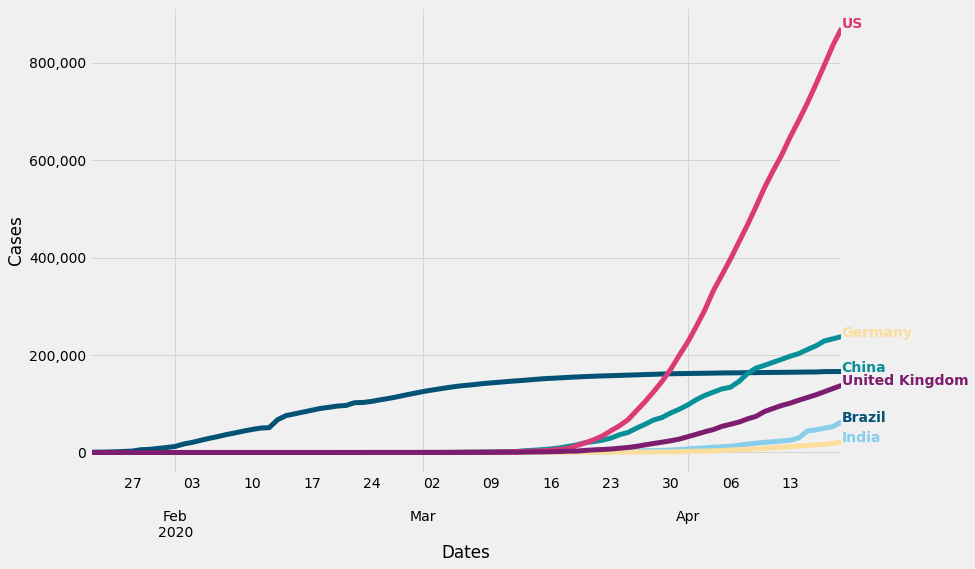

In [0]:
colors={'India':'#87ceeb','Brazil':'#045275', 'China':'#089099',  'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')


plot=covid.plot(figsize=(12,8),color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.set_xlabel('Dates')
plot.set_ylabel('Cases')
plot.grid(color='#d4d4d4')



for country in list(colors.keys()):
    plot.text(x = df1.index[-1], y = df1[country].max(), color = colors[country], s = country, weight = 'bold')


In [0]:
df1.head()

Country,Brazil,China,Germany,India,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0


In [0]:
df1.tail()

Country,Brazil,China,Germany,India,US,United Kingdom
Date,,,,,,
2020-04-15,44082,165013,211157,14159,716771,112745
2020-04-16,46375,165150,218750,15646,755211,118279
2020-04-17,49849,165948,228863,16879,795024,124770
2020-04-18,53038,166037,233201,18706,835701,131226
2020-04-19,63246,166131,237770,21028,870084,137703


In [0]:
from datetime import datetime,timedelta

today=datetime.today().strftime('%Y-%m-%d')
lastfive=df1.copy()
five=datetime.today()-timedelta(days=5)
five=five.strftime('%Y-%m-%d')

print("Today is",today)
print("5",five)

lastfive=lastfive['2020-04-19':'2020-04-14']

print(lastfive)

Today is 2020-04-20
5 2020-04-15
Empty DataFrame
Columns: [Brazil, China, Germany, India, US, United Kingdom]
Index: []


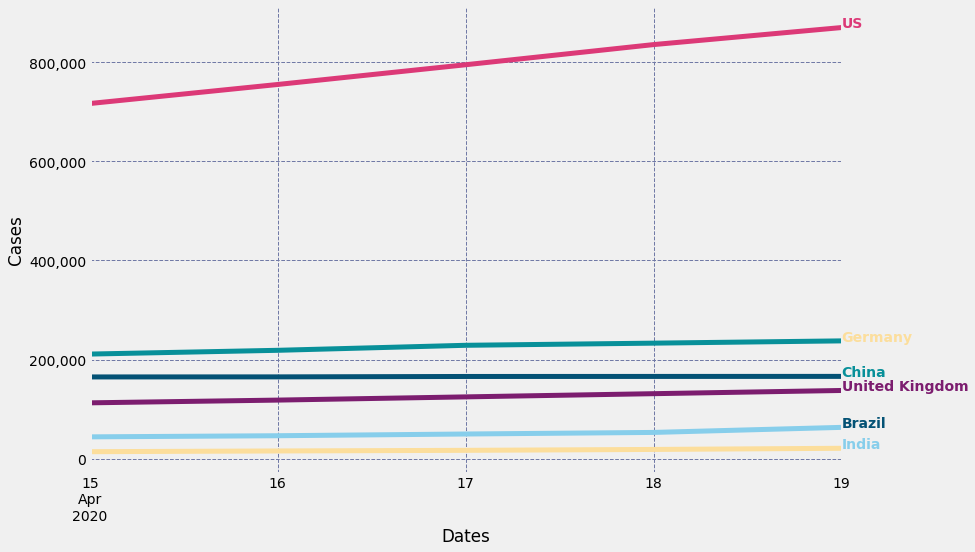

In [0]:
colors={'India':'#87ceeb','Brazil':'#045275', 'China':'#089099',  'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

temp=df1.tail()
plot=temp.plot(figsize=(12,8),color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.set_xlabel('Dates')
plot.set_ylabel('Cases')

plot.grid(color='#717aa6',linestyle='--',which='both')



for country in list(colors.keys()):
    plot.text(x = df1.index[-1], y = df1[country].max(), color = colors[country], s = country, weight = 'bold')

dict_values(['#87ceeb', '#045275', '#089099', '#FCDE9C', '#DC3977', '#7C1D6F'])